Populating the interactive namespace from numpy and matplotlib


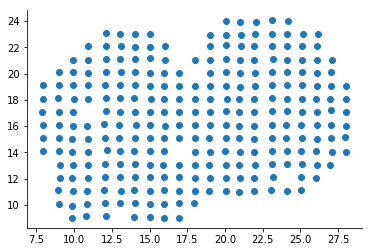

In [1]:
%pylab inline
import pandas as pd

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

results = pd.read_csv('../MouseOB/MOB_final_results.csv', index_col=0)
ms_results = pd.read_csv('../MouseOB/MOB_MS_results.csv', index_col=0)
sample_info = pd.read_csv('../MouseOB/MOB_sample_info.csv', index_col=0)

df = pd.read_csv('../MouseOB/data/Rep11_MOB_0.csv', index_col=0)
df = df.T[df.sum(0) >= 3].T  # Filter practically unobserved genes
sample_info = sample_info.query('total_counts > 10')  # Remove empty features
df = df.loc[sample_info.index]
dfm = np.log10(df + 1)

plt.scatter(sample_info.x, sample_info.y);

In [73]:
X = sample_info[['x', 'y']]

In [74]:
import SpatialDE
from scipy import stats

In [75]:
sim_expr = stats.norm.rvs(loc=0., scale=1., size=(X.shape[0], 3000))

In [76]:
sim_expr.shape

(260, 3000)

In [77]:
sim_expr = pd.DataFrame.from_records(sim_expr)

In [78]:
results = SpatialDE.run(X, sim_expr)
results.loc[results.pval < 1e-16, 'pval'] = 1e-16

INFO:root:Performing DE test
INFO:root:Pre-calculating USU^T = K's ...
INFO:root:Done: 0.11s
INFO:root:Fitting gene models
INFO:root:Model 1 of 10
INFO:root:Model 2 of 10                             
INFO:root:Model 3 of 10                             
INFO:root:Model 4 of 10                             
INFO:root:Model 5 of 10                             
INFO:root:Model 6 of 10                             
INFO:root:Model 7 of 10                             
INFO:root:Model 8 of 10                             
INFO:root:Model 9 of 10                             
INFO:root:Model 10 of 10                            


In [79]:
tt = np.logspace(-2, 0, 10)
pp = []
for i in tt:
    pp.append(results.query('pval < @i').shape[0])
    print(i, pp[-1] / 1500)

0.01 0.0
0.016681005372 0.0006666666666666666
0.0278255940221 0.0033333333333333335
0.0464158883361 0.005333333333333333
0.0774263682681 0.012
0.129154966501 0.032
0.215443469003 0.10533333333333333
0.35938136638 0.2846666666666667
0.599484250319 0.6086666666666667
1.0 2.0


In [80]:
pp = np.array(pp)

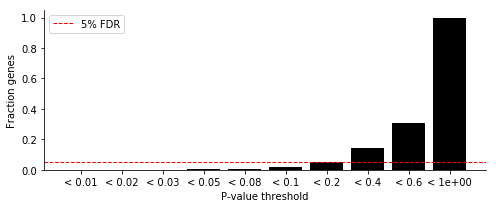

In [82]:
figsize(7, 3)

plt.bar(np.arange(10), pp / 3000, fc='k')
plt.xticks(np.arange(10), ['< {:0.1}'.format(i) for i in tt]);
plt.xlabel('P-value threshold')
plt.ylabel('Fraction genes');
plt.axhline(0.05, c='r', ls='--', lw=1, label='5% FDR')
plt.legend();

plt.tight_layout()
plt.savefig('null_model_simulation.pdf', bbox_inches='tight')